In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the results from CSV files
cnn_results = pd.read_csv('data/cnn_results.csv')
rnn_results = pd.read_csv('data/rnn_results.csv')
dnn_results = pd.read_csv('data/dnn_results.csv')

# Add a model column to identify the source of results
cnn_results['Model'] = 'CNN'
rnn_results['Model'] = 'RNN'
dnn_results['Model'] = 'DNN'

In [15]:
# Combine all results into a single DataFrame
combined_results = pd.concat([cnn_results, rnn_results, dnn_results])

# Select columns to compare the results
# Assuming the performance metric to compare is the last column (adjust if needed)
# metric_column = combined_results.columns[-2]  # Adjust for specific metric
# combined_results = combined_results[['Model', metric_column]].copy()
combined_results = combined_results.rename(columns={'Unnamed: 0':'train_dataset'})

In [16]:
combined_results

,train_dataset,search time,best params,en_handwritten,hhd,mashtots,emnist,Model
0,en_handwritten,24.466197,"{'conv1_out_channels': 64, 'conv2_out_channels...",0.603590,0.713433,0.745311,0.733445,CNN
1,hhd,15.996022,"{'conv1_out_channels': 16, 'conv2_out_channels...",0.618103,0.758779,0.849595,0.741753,CNN
2,mashtots,206.866321,"{'conv1_out_channels': 32, 'conv2_out_channels...",0.577566,0.755739,0.797977,0.738368,CNN
3,emnist,2502.529136,"{'conv1_out_channels': 32, 'conv2_out_channels...",0.462173,0.746144,0.805535,0.747584,CNN
0,en_handwritten,21.470838,"{'hidden_size': 128, 'num_layers': 3, 'lr': 0....",0.000512,0.204960,0.000338,0.001508,RNN
1,hhd,15.097302,"{'hidden_size': 256, 'num_layers': 3, 'lr': 0....",0.108577,0.472247,0.630684,0.558585,RNN
2,mashtots,209.137794,"{'hidden_size': 256, 'num_layers': 3, 'lr': 0....",0.128048,0.453548,0.573117,0.469373,RNN
3,emnist,2521.848914,"{'hidden_size': 128, 'num_layers': 2, 'lr': 0....",0.000513,0.353496,0.238712,0.686173,RNN
0,en_handwritten,20.771345,"{'hidden1': 192, 'hidden2': 64, 'lr': 0.000213...",0.016076,0.541261,0.538938,0.706763,DNN
1,hhd,18.333368,"{'hidden1': 128, 'hidden2': 128, 'lr': 0.00090...",0.000512,0.598753,0.680780,0.667831,DNN


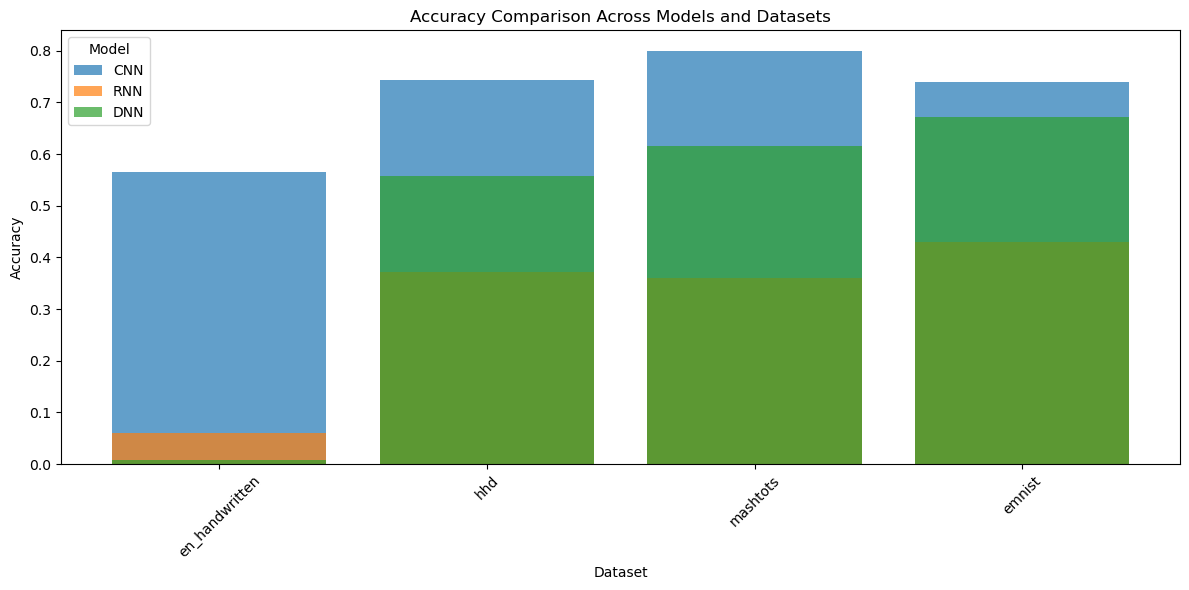

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
datasets = ["en_handwritten", "hhd", "mashtots", "emnist"]

for model in combined_results["Model"].unique():
    means = [combined_results.loc[combined_results["Model"] == model, dataset].mean() for dataset in datasets]
    ax.bar(datasets, means, label=model, alpha=0.7)

ax.set_title("Accuracy Comparison Across Models and Datasets")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Dataset")
ax.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

train_dataset
emnist            2502.529136
en_handwritten      24.466197
hhd                 15.996022
mashtots           206.866321
Name: search time, dtype: float64
train_dataset
emnist            2521.848914
en_handwritten      21.470838
hhd                 15.097302
mashtots           209.137794
Name: search time, dtype: float64
train_dataset
emnist            1917.377806
en_handwritten      20.771345
hhd                 18.333368
mashtots           157.849976
Name: search time, dtype: float64


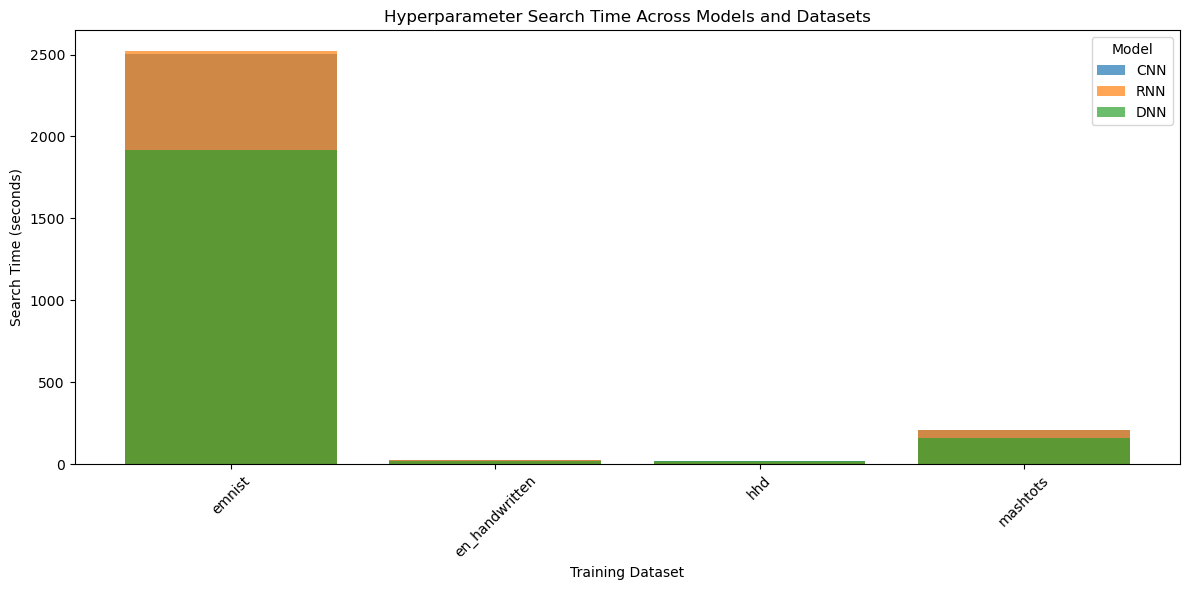

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

for model in combined_results["Model"].unique():
    search_times = combined_results.loc[combined_results["Model"] == model].groupby("train_dataset")["search time"].mean()
    print(search_times)
    ax.bar(search_times.index, search_times.values, label=model, alpha=0.7)

ax.set_title("Hyperparameter Search Time Across Models and Datasets")
ax.set_ylabel("Search Time (seconds)")
ax.set_xlabel("Training Dataset")
ax.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

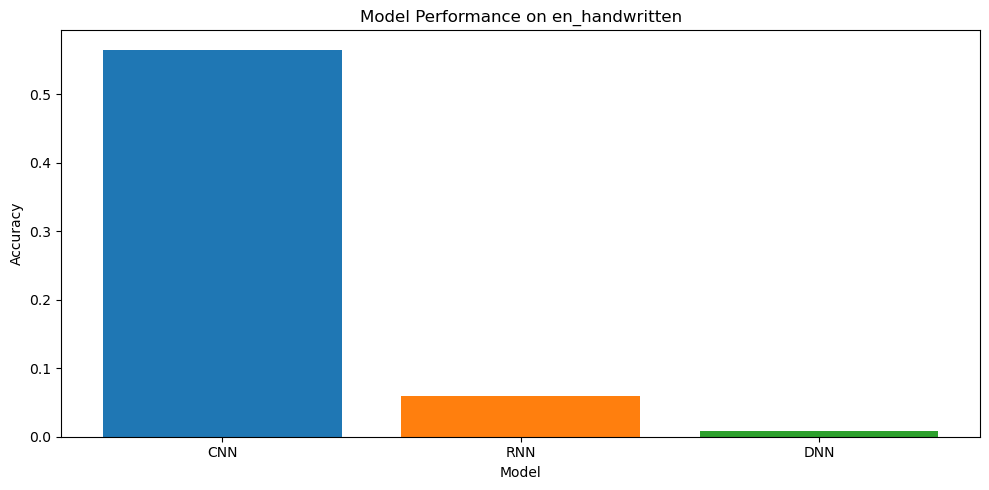

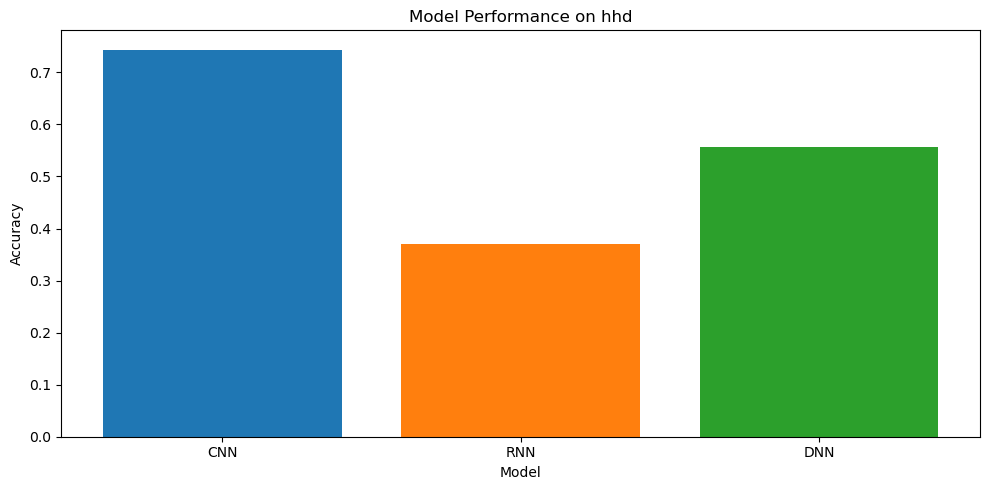

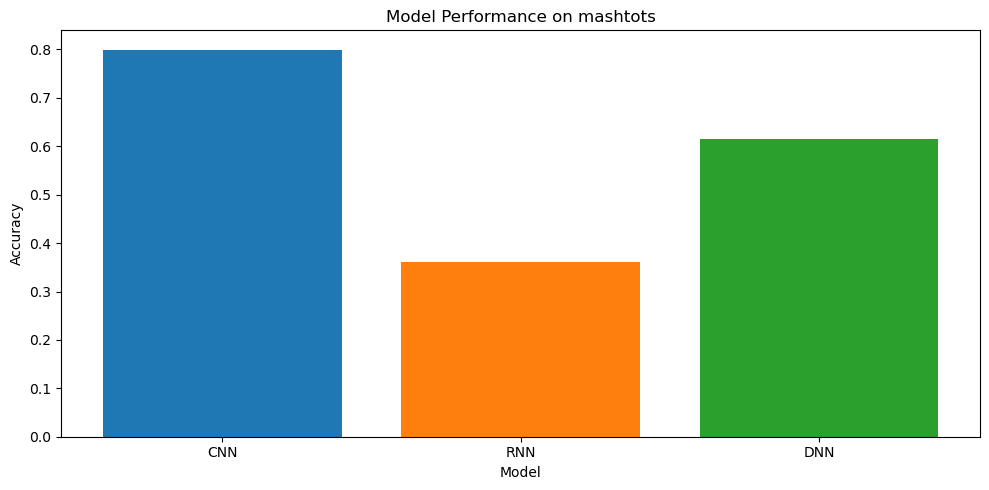

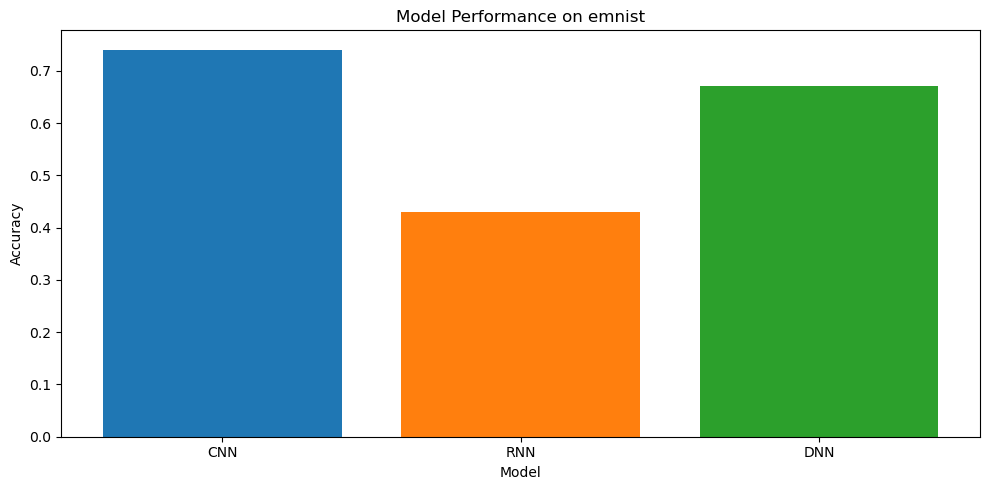

In [20]:
for dataset in datasets:
    fig, ax = plt.subplots(figsize=(10, 5))
    for model in combined_results["Model"].unique():
        accuracies = combined_results.loc[combined_results["Model"] == model, dataset]
        ax.bar(model, accuracies.mean(), label=f'{dataset} ({model})')

    ax.set_title(f"Model Performance on {dataset}")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Model")
    plt.tight_layout()
    plt.show()

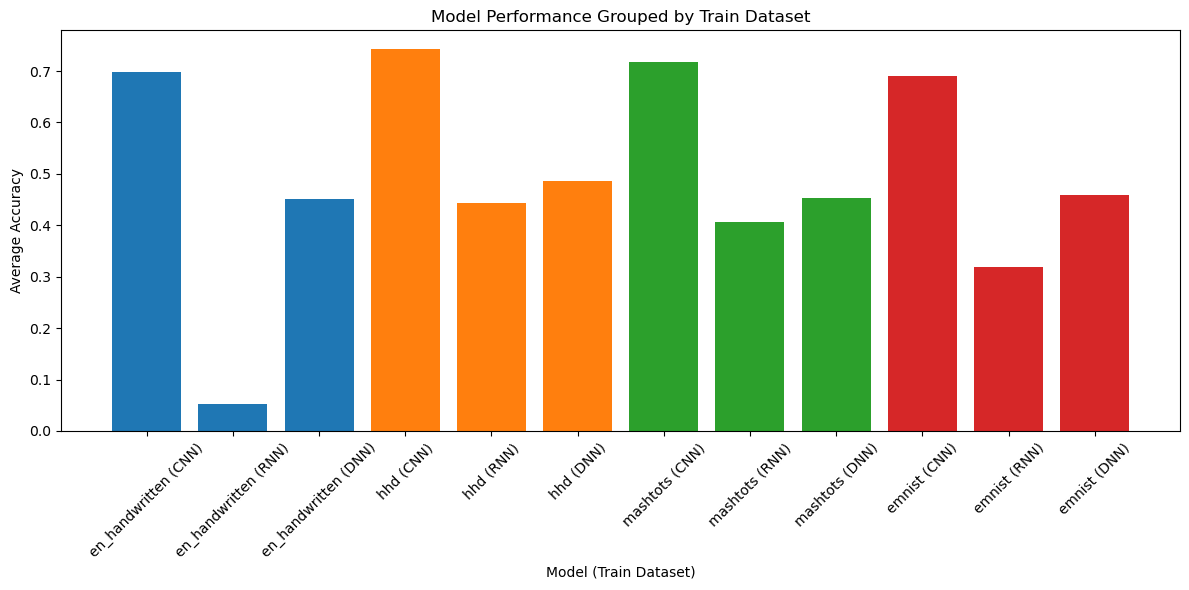

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
train_datasets = combined_results["train_dataset"].unique()

for train_dataset in train_datasets:
    accuracies = combined_results.loc[combined_results["train_dataset"] == train_dataset, ["Model", "en_handwritten", "hhd", "mashtots", "emnist"]]
    mean_accuracies = accuracies.set_index("Model").mean(axis=1)
    ax.bar(
        [f"{train_dataset} ({model})" for model in mean_accuracies.index],
        mean_accuracies.values,
        label=train_dataset
    )

ax.set_title("Model Performance Grouped by Train Dataset")
ax.set_ylabel("Average Accuracy")
ax.set_xlabel("Model (Train Dataset)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

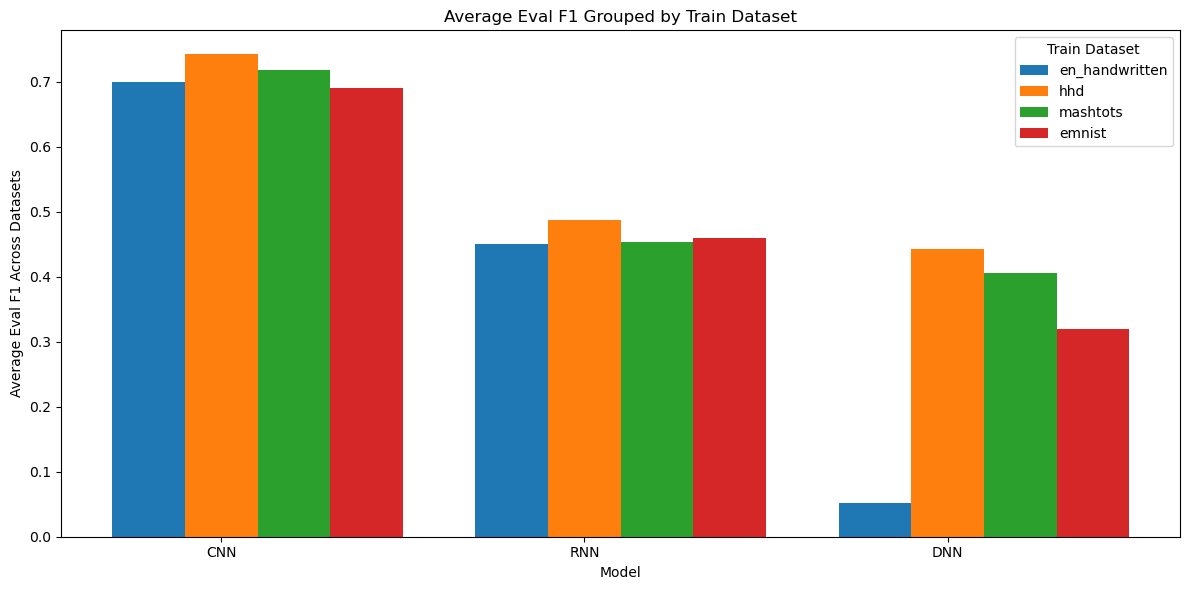

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))

train_datasets = combined_results["train_dataset"].unique()
bar_width = 0.2
index = range(len(combined_results["Model"].unique()))

for i, train_dataset in enumerate(train_datasets):
    accuracies = combined_results[combined_results["train_dataset"] == train_dataset]
    mean_accuracies = accuracies.groupby("Model")[["en_handwritten", "hhd", "mashtots", "emnist"]].mean().mean(axis=1)
    ax.bar(
        [x + i * bar_width for x in index],
        mean_accuracies.values,
        bar_width,
        label=train_dataset
    )

# Set tick labels for models
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(combined_results["Model"].unique())
ax.set_title("Average Eval F1 Grouped by Train Dataset")
ax.set_ylabel("Average Eval F1 Across Datasets")
ax.set_xlabel("Model")
ax.legend(title="Train Dataset")
plt.tight_layout()
plt.show()

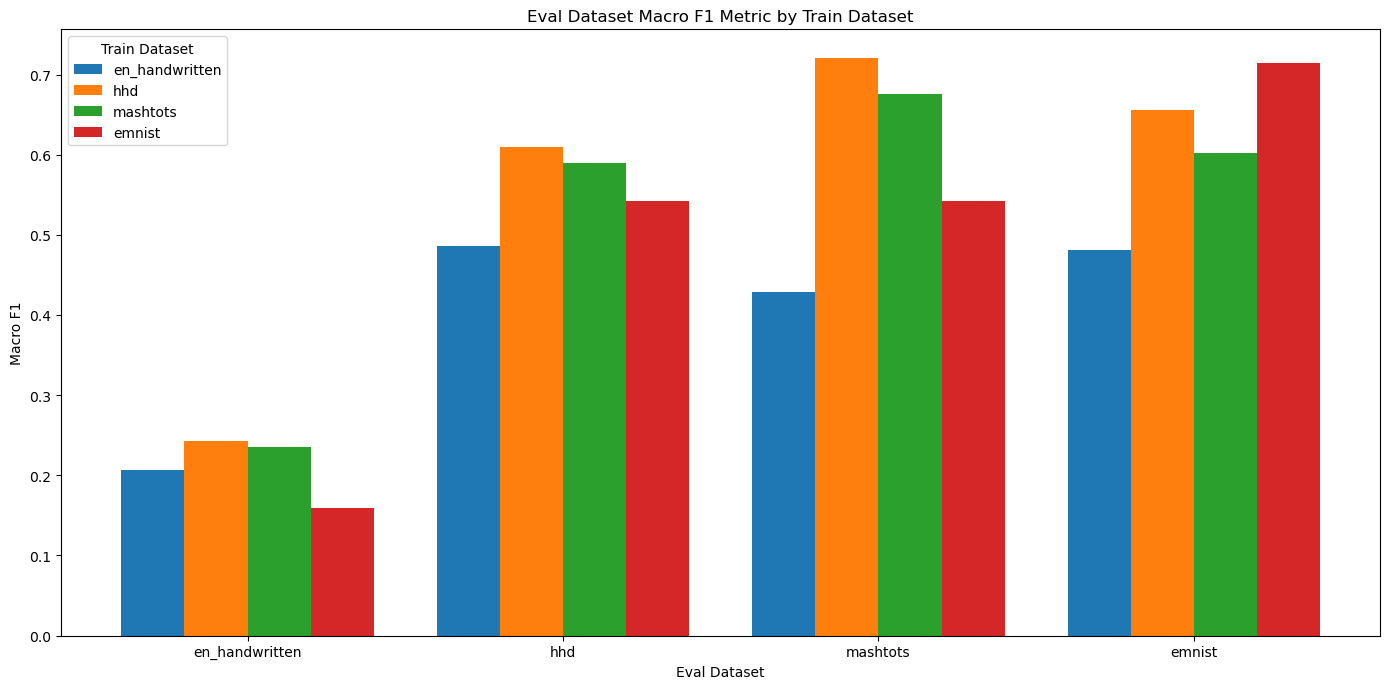

In [25]:
fig, ax = plt.subplots(figsize=(14, 7))

train_datasets = combined_results["train_dataset"].unique()
bar_width = 0.2
index = range(len(datasets))  # One bar group for each dataset metric

for i, train_dataset in enumerate(train_datasets):
    mean_accuracies = combined_results[combined_results["train_dataset"] == train_dataset][datasets].mean()
    ax.bar(
        [x + i * bar_width for x in index],
        mean_accuracies.values,
        bar_width,
        label=train_dataset
    )

# Set tick labels for dataset metrics
ax.set_xticks([x + bar_width * (len(train_datasets) / 2 - 0.5) for x in index])
ax.set_xticklabels(datasets)
ax.set_title("Eval Dataset Macro F1 Metric by Train Dataset")
ax.set_ylabel("Macro F1")
ax.set_xlabel("Eval Dataset")
ax.legend(title="Train Dataset")
plt.tight_layout()
plt.show()

In [31]:
combined_results[['train_dataset','best params','Model']]

,train_dataset,best params,Model
0,en_handwritten,"{'conv1_out_channels': 64, 'conv2_out_channels...",CNN
1,hhd,"{'conv1_out_channels': 16, 'conv2_out_channels...",CNN
2,mashtots,"{'conv1_out_channels': 32, 'conv2_out_channels...",CNN
3,emnist,"{'conv1_out_channels': 32, 'conv2_out_channels...",CNN
0,en_handwritten,"{'hidden_size': 128, 'num_layers': 3, 'lr': 0....",RNN
1,hhd,"{'hidden_size': 256, 'num_layers': 3, 'lr': 0....",RNN
2,mashtots,"{'hidden_size': 256, 'num_layers': 3, 'lr': 0....",RNN
3,emnist,"{'hidden_size': 128, 'num_layers': 2, 'lr': 0....",RNN
0,en_handwritten,"{'hidden1': 192, 'hidden2': 64, 'lr': 0.000213...",DNN
1,hhd,"{'hidden1': 128, 'hidden2': 128, 'lr': 0.00090...",DNN


In [33]:
for row in combined_results['best params']:
    print(row)

{'conv1_out_channels': 64, 'conv2_out_channels': 128, 'fc1_out_features': 128, 'lr': 0.0010856960607239867}
{'conv1_out_channels': 16, 'conv2_out_channels': 96, 'fc1_out_features': 256, 'lr': 0.0005963104073628422}
{'conv1_out_channels': 32, 'conv2_out_channels': 96, 'fc1_out_features': 192, 'lr': 0.0008612435216978252}
{'conv1_out_channels': 32, 'conv2_out_channels': 64, 'fc1_out_features': 256, 'lr': 0.0002120327148454758}
{'hidden_size': 128, 'num_layers': 3, 'lr': 0.0012950141876025422}
{'hidden_size': 256, 'num_layers': 3, 'lr': 0.000337094227066931}
{'hidden_size': 256, 'num_layers': 3, 'lr': 0.00039626050846070155}
{'hidden_size': 128, 'num_layers': 2, 'lr': 0.00013548522841725177}
{'hidden1': 192, 'hidden2': 64, 'lr': 0.00021311560449664842}
{'hidden1': 128, 'hidden2': 128, 'lr': 0.0009000792610109841}
{'hidden1': 192, 'hidden2': 64, 'lr': 0.0017704020805104433}
{'hidden1': 192, 'hidden2': 96, 'lr': 0.0002327628019429314}
